In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import time

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32, label='target'):
  dataframe = dataframe.copy()
  labels = dataframe.pop(label)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [3]:
data = pd.read_csv('weatherAUS.csv')

In [4]:
data = data.fillna(data.mean())
data = data.dropna()
data.drop_duplicates(inplace = True)

In [5]:
data.drop('Date', axis=1, inplace=True)
data['RainTomorrow'] = np.where(data['RainTomorrow'] == 'No', 0, 1)

In [6]:
records = []

In [7]:
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = time.process_time()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch,time.process_time() - self.timetaken))
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(*zip(*self.times))
        plt.show()
        
        records.append([self.times[-1][1], logs['accuracy']])

In [8]:
features = {}

features[2] = list(data.drop('RainTomorrow', axis=1).columns)

features[0] = [f for f in features[2] if f not in ['MinTemp', 'MaxTemp', 'Evaporation', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm']]

features[1] = [f for f in features[2] if f not in ['MinTemp', 'MaxTemp', 'Evaporation', 'Temp9am', 'Temp3pm']]

24742 train examples
98968 test examples
Train size:  0.2 Features version:  0
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


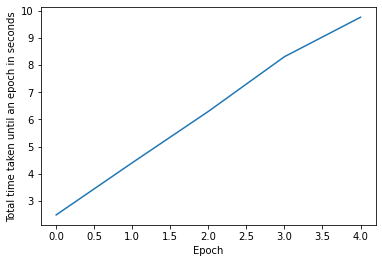

Consider rewriting this model with the Functional API.
3093/3093 [==============================] - 3s 962us/step - loss: 0.3872 - accuracy: 0.83270s - loss: 0.3876 - accura
Train size:  0.2 Features version:  1
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


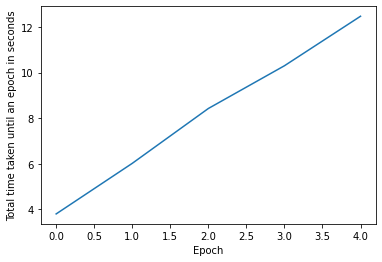

Consider rewriting this model with the Functional API.
3093/3093 [==============================] - 3s 981us/step - loss: 0.3568 - accuracy: 0.8501
Train size:  0.2 Features version:  2
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


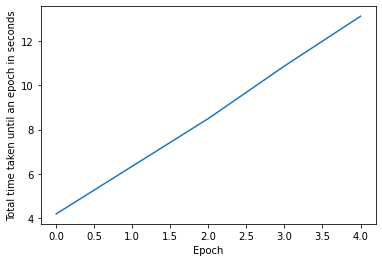

Consider rewriting this model with the Functional API.
3093/3093 [==============================] - 3s 1ms/step - loss: 0.3524 - accuracy: 0.8479
61855 train examples
61855 test examples
Train size:  0.5 Features version:  0
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


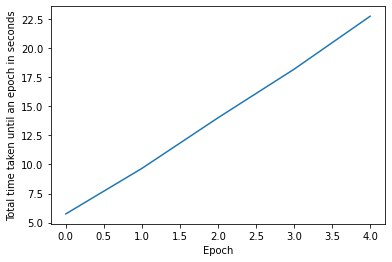

Consider rewriting this model with the Functional API.
1933/1933 [==============================] - 2s 949us/step - loss: 0.3982 - accuracy: 0.7972
Train size:  0.5 Features version:  1
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


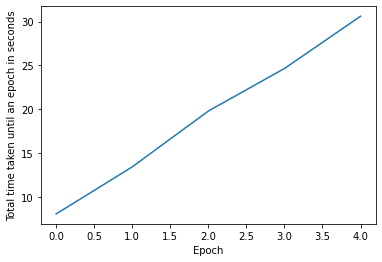

Consider rewriting this model with the Functional API.
1933/1933 [==============================] - 2s 978us/step - loss: 0.3632 - accuracy: 0.8408
Train size:  0.5 Features version:  2
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


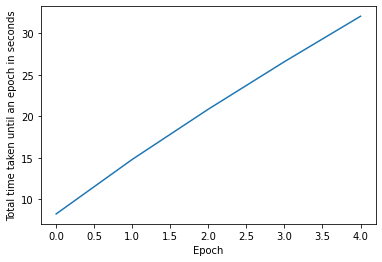

Consider rewriting this model with the Functional API.
1933/1933 [==============================] - 2s 1ms/step - loss: 0.3505 - accuracy: 0.8471
98968 train examples
24742 test examples
Train size:  0.8 Features version:  0
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


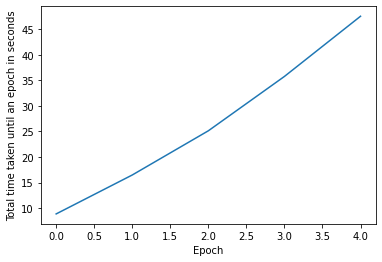

Consider rewriting this model with the Functional API.
774/774 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8340
Train size:  0.8 Features version:  1
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


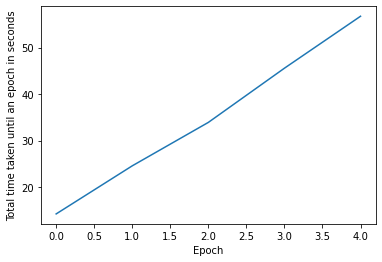

Consider rewriting this model with the Functional API.
774/774 [==============================] - 1s 1ms/step - loss: 0.3602 - accuracy: 0.8438
Train size:  0.8 Features version:  2
Consider rewriting this model with the Functional API.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Consider rewriting this model with the Functional API.


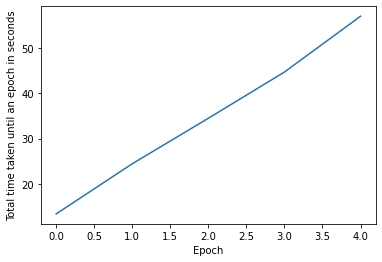

Consider rewriting this model with the Functional API.
774/774 [==============================] - 1s 1ms/step - loss: 0.3451 - accuracy: 0.8422


In [9]:
for train_size in [0.2, 0.5, 0.8]:

    train, test = train_test_split(data, test_size=1-train_size)
    print(len(train), 'train examples')
    print(len(test), 'test examples')
    
    batch_size = 32
    train_ds = df_to_dataset(train, batch_size=batch_size, label='RainTomorrow')
    test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size, label='RainTomorrow')
    
    for features_version in [0,1,2]:
        
        print("Train size: ", train_size, "Features version: ", features_version)

        feature_columns = []

        numeric_cols = data[features[features_version]].select_dtypes(include=np.number).columns.tolist()

        # numeric cols
        for header in numeric_cols:
            feature_columns.append(feature_column.numeric_column(header))

        # embedding cols
        for header in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
            if(header not in features[features_version]):
                continue
                
            col = feature_column.categorical_column_with_vocabulary_list(
                  header, data[header].unique())
            embedding = feature_column.embedding_column(col, dimension=8)
            feature_columns.append(embedding)

        feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

        model = tf.keras.Sequential([
          feature_layer,
          layers.Dense(128, activation='relu'),
          layers.Dense(128, activation='relu'),
          layers.Dropout(.1),
          layers.Dense(1)
        ])

        model.compile(optimizer='adam',
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        timetaken = timecallback()
        
        model.fit(train_ds, epochs=5, callbacks=[timetaken], verbose=0)
        
        _, test_accuracy = model.evaluate(test_ds)
        records[-1].append(test_accuracy)

In [10]:
records

[[9.765625, 0.818203866481781, 0.8327237367630005],
 [12.46875, 0.8266510367393494, 0.8500727415084839],
 [13.125, 0.8329965472221375, 0.8478599190711975],
 [22.71875, 0.8255274295806885, 0.7971546649932861],
 [30.609375, 0.8408697843551636, 0.8408374190330505],
 [32.046875, 0.8420014381408691, 0.8470939993858337],
 [47.515625, 0.8284698128700256, 0.8340473771095276],
 [56.71875, 0.8370988368988037, 0.8438283205032349],
 [57.109375, 0.8418681025505066, 0.8421711921691895]]

In [21]:
results = []
i = 0
for train_size in [0.2, 0.5, 0.8]:
    for features_version in [0, 1, 2]:
        results.append({
            'split': train_size, 
            'features': features_version,
            'time': round(records[i][0], 3) ,
            'train_acc': round(records[i][1], 3),
            'test_acc': round(records[i][2], 3)
        })
        
        i = i+1

In [22]:
results_df = pd.DataFrame(results)
results_df

,split,features,time,train_acc,test_acc
0,0.2,0,9.766,0.818,0.833
1,0.2,1,12.469,0.827,0.850
2,0.2,2,13.125,0.833,0.848
3,0.5,0,22.719,0.826,0.797
4,0.5,1,30.609,0.841,0.841
5,0.5,2,32.047,0.842,0.847
6,0.8,0,47.516,0.828,0.834
7,0.8,1,56.719,0.837,0.844
8,0.8,2,57.109,0.842,0.842


In [23]:
results_df.to_csv('NN-Australia.csv')

In [24]:

print(results_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  split &  features &    time &  train\_acc &  test\_acc \\
\midrule
0 &    0.2 &         0 &   9.766 &      0.818 &     0.833 \\
1 &    0.2 &         1 &  12.469 &      0.827 &     0.850 \\
2 &    0.2 &         2 &  13.125 &      0.833 &     0.848 \\
3 &    0.5 &         0 &  22.719 &      0.826 &     0.797 \\
4 &    0.5 &         1 &  30.609 &      0.841 &     0.841 \\
5 &    0.5 &         2 &  32.047 &      0.842 &     0.847 \\
6 &    0.8 &         0 &  47.516 &      0.828 &     0.834 \\
7 &    0.8 &         1 &  56.719 &      0.837 &     0.844 \\
8 &    0.8 &         2 &  57.109 &      0.842 &     0.842 \\
\bottomrule
\end{tabular}

